In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Set display options to prevent truncation
pd.set_option('display.max_rows', None)    # Display all rows
pd.set_option('display.max_columns', None) # Display all columns


In [ ]:
# iporting data

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data/annotated_data_hausa.xlsx')


In [ ]:
df.head(5)

tweet_id  user_username  \
0  1529190000000000000        mhs4lyf   
1  1529190000000000000        mhs4lyf   
2  1516250000000000000    kaduna_mboy   
3  1641890000000000000  BaheerahUsman   
4  1529430000000000000   the_scholar1   

                                                text    Label  \
0  an kashe tsinanniyar kafura kun ishemu da maga...  Abusive   
1  an kashe tsinanniyar kafura kun ishemu da maga...  Abusive   
2  @elbasheerb @rasheedat__ jahilci hauka ji all ...  Abusive   
3                gtbank return my 300 naira barayi=-  Abusive   
4  @sir__md duk kuma barayi ne manyan administrat...  Abusive   

       conversation_id lang possibly_sensitive                created_at  \
0  1529190000000000000   in              False  2022-05-24T20:15:14.000Z   
1  1529190000000000000   in              False  2022-05-24T20:15:14.000Z   
2  1516140000000000000   in              False  2022-04-19T03:10:55.000Z   
3  1641890000000000000   in              False  2023-03-31T19:35:12.000Z   
4  1529430000000000000   in              False  2022-05-25T11:46:15.000Z   

             author_id  in_reply_to_user_id user_verified  \
0           2290469884                  NaN         False   
1           2290469884                  NaN         False   
2  1489450000000000000          700082187.0         False   
3   935513000000000000                  NaN         False   
4            376700436          873468943.0          True   

                        user_name  \
0                        Muhammad   
1                        Muhammad   
2  discipline master =_x000E_=¶<û   
3                      mai turare   
4                         Scholar   

                              user_profile_image_url  \
0  https://pbs.twimg.com/profile_images/164340072...   
1  https://pbs.twimg.com/profile_images/164340072...   
2                                                NaN   
3  https://pbs.twimg.com/profile_images/165087338...   
4  https://pbs.twimg.com/profile_images/164537302...   

            user_created_at  \
0  2014-01-18T21:37:58.000Z   
1  2014-01-18T21:37:58.000Z   
2                       NaN   
3  2017-11-28T14:17:34.000Z   
4  2011-09-20T10:42:47.000Z   

                                    user_description user_pinned_tweet_id  \
0                 Hasbunallahu Wa Ni'imal Wakeel=O<û                  NaN   
1                 Hasbunallahu Wa Ni'imal Wakeel=O<û                  NaN   
2                                                NaN                  NaN   
3  muslimah,food lover turarenwuta,humra and oil ...  1580000000000000000   
4  You can't make everyone happy but you can at l...  1640000000000000000   

  user_url          user_location user_protected retweet_count like_count  \
0      NaN    Tudun-Wada, Nigeria          False             0          0   
1      NaN    Tudun-Wada, Nigeria          False             0          0   
2      NaN                    NaN            NaN           NaN        NaN   
3      NaN       Adamawa, Nigeria          False             0          0   
4      NaN  Any Community in Need          False             0          2   

   quote_count  impression_count  user_tweet_count  user_list_count  \
0          0.0               0.0           92448.0              2.0   
1          0.0               0.0           92443.0              2.0   
2          NaN               NaN               NaN              NaN   
3          0.0              32.0           14256.0              0.0   
4          0.0               0.0          111062.0             23.0   

  user_followers_count user_following_count sourcetweet_type sourcetweet_id  \
0                 2147                  457              NaN            NaN   
1                 2146                  457              NaN            NaN   
2                  NaN                  NaN              NaN            NaN   
3                 1310                 1039              NaN            NaN   
4                86878                12755              

In [ ]:
df.shape

(1886, 35)

# Data Cleaning

In [ ]:
# Remove duplicates based on the 'tweet_id' column
df_no_duplicates = df.drop_duplicates(subset='tweet_id')

In [ ]:
df_no_duplicates.shape

(1613, 35)

In [ ]:
df_no_duplicates.head()

tweet_id  user_username  \
0  1529190000000000000        mhs4lyf   
2  1516250000000000000    kaduna_mboy   
3  1641890000000000000  BaheerahUsman   
4  1529430000000000000   the_scholar1   
5  1504720000000000000   lawanceiliya   

                                                text    Label  \
0  an kashe tsinanniyar kafura kun ishemu da maga...  Abusive   
2  @elbasheerb @rasheedat__ jahilci hauka ji all ...  Abusive   
3                gtbank return my 300 naira barayi=-  Abusive   
4  @sir__md duk kuma barayi ne manyan administrat...  Abusive   
5  barayi sun fara siyan form din expression of i...  Abusive   

       conversation_id lang possibly_sensitive                created_at  \
0  1529190000000000000   in              False  2022-05-24T20:15:14.000Z   
2  1516140000000000000   in              False  2022-04-19T03:10:55.000Z   
3  1641890000000000000   in              False  2023-03-31T19:35:12.000Z   
4  1529430000000000000   in              False  2022-05-25T11:46:15.000Z   
5  1504720000000000000   in              False  2022-03-18T07:23:28.000Z   

             author_id  in_reply_to_user_id user_verified  \
0           2290469884                  NaN         False   
2  1489450000000000000          700082187.0         False   
3   935513000000000000                  NaN         False   
4            376700436          873468943.0          True   
5            167462516                  NaN         False   

                        user_name  \
0                        Muhammad   
2  discipline master =_x000E_=¶<û   
3                      mai turare   
4                         Scholar   
5            Lawal Ibn illyas OFR   

                              user_profile_image_url  \
0  https://pbs.twimg.com/profile_images/164340072...   
2                                                NaN   
3  https://pbs.twimg.com/profile_images/165087338...   
4  https://pbs.twimg.com/profile_images/164537302...   
5  https://pbs.twimg.com/profile_images/163823763...   

            user_created_at  \
0  2014-01-18T21:37:58.000Z   
2                       NaN   
3  2017-11-28T14:17:34.000Z   
4  2011-09-20T10:42:47.000Z   
5  2010-07-16T17:12:55.000Z   

                                    user_description user_pinned_tweet_id  \
0                 Hasbunallahu Wa Ni'imal Wakeel=O<û                  NaN   
2                                                NaN                  NaN   
3  muslimah,food lover turarenwuta,humra and oil ...  1580000000000000000   
4  You can't make everyone happy but you can at l...  1640000000000000000   
5  Muslim Sunni #SecureNorth #Critics North First...  1580000000000000000   

                  user_url          user_location user_protected  \
0                      NaN    Tudun-Wada, Nigeria          False   
2                      NaN                    NaN            NaN   
3                      NaN       Adamawa, Nigeria          False   
4                      NaN  Any Community in Need          False   
5  https://t.co/RNYa9A4moS         Lagos, Nigeria          False   

  retweet_count like_count  quote_count  impression_count  user_tweet_count  \
0             0          0          0.0               0.0           92448.0   
2           NaN        NaN          NaN               NaN               NaN   
3             0          0          0.0              32.0           14256.0   
4             0          2          0.0               0.0          111062.0   
5             0          0          0.0               0.0           20528.0   

   user_list_count user_followers_count user_following_count sourcetweet_type  \
0              2.0                 2147                  457              NaN   
2              NaN                  NaN                  NaN              NaN   
3              0.0                 1310                 1039              NaN   
4             23.0                86878                12755              NaN   
5              3.0                  702              

In [ ]:
# Remove duplicates based on the 'tweet_id' column
df_no_duplicates = df_no_duplicates.drop_duplicates(subset='user_username')

In [ ]:
df_no_duplicates.shape

(1177, 35)

In [ ]:
df_no_duplicates

tweet_id  \
0                                   1529190000000000000   
2                                   1516250000000000000   
3                                   1641890000000000000   
4                                   1529430000000000000   
5                                   1504720000000000000   
6                                   1509410000000000000   
7                                   1339640000000000000   
8                                   1264670000000000000   
9                                   1373020000000000000   
10                                  1498630000000000000   
11                                  1304390000000000000   
12                                  1632390000000000000   
13                                  1342110000000000000   
14                                  1320800000000000000   
15                                  1537300000000000000   
16                                  1526540000000000000   
17                                  1524760000000000000   
18                                  1384190000000000000   
19                                  1248400000000000000   
20                                  1309430000000000000   
21                                  1397850000000000000   
22                                  1483760000000000000   
23                                  1502880000000000000   
24                                  1507070000000000000   
25                                  1378700000000000000   
27                                  1285350000000000000   
31                                  1542930000000000000   
32                                  1583080000000000000   
33                                  1508890000000000000   
35                                  1372180000000000000   
36                                  1560310000000000000   
37                                  1564660000000000000   
39                                  1319330000000000000   
40                                  1636700000000000000   
41                                  1320320000000000000   
42                                  1519940000000000000   
43                                  1328320000000000000   
44                                  1603870000000000000   
45                                  1544760000000000000   
47                                  1575410000000000000   
48                                  1616200000000000000   
49                                  1280210000000000000   
50                                  1319680000000000000   
52                                  1354100000000000000   
53                                  1639340000000000000   
54                                  1359030000000000000   
56                                  1599020000000000000   
57                                  1316970000000000000   
58                                  1517930000000000000   
59                                  1484860000000000000   
60                                  1366130000000000000   
61                                  1597610000000000000   
63                                  1254060000000000000   
64                                  1315570000000000000   
65                                  1321340000000000000   
66                                  1517510000000000000   
67                                  1302700000000000000   
68                                  1586500000000000000   
69                                  1254340000000000000   
71                                  1534390000000000000   
72                                  1227570000000000000   
73                                  1484570000000000000   
74                                  1630680000000000000   
75                                  1376890000000000000   
76                                  1598240000000000000   
77                                  1320120000000000000   
78                                  1256330000000000000   
80                                 

In [ ]:
df_text_label = df_no_duplicates[['tweet_id', 'user_username', 'text', 'Label']]

In [ ]:
df_text_label.head()

tweet_id  user_username  \
0  1529190000000000000        mhs4lyf   
2  1516250000000000000    kaduna_mboy   
3  1641890000000000000  BaheerahUsman   
4  1529430000000000000   the_scholar1   
5  1504720000000000000   lawanceiliya   

                                                text    Label  
0  an kashe tsinanniyar kafura kun ishemu da maga...  Abusive  
2  @elbasheerb @rasheedat__ jahilci hauka ji all ...  Abusive  
3                gtbank return my 300 naira barayi=-  Abusive  
4  @sir__md duk kuma barayi ne manyan administrat...  Abusive  
5  barayi sun fara siyan form din expression of i...  Abusive

In [ ]:
data1 = df_text_label.iloc[1][2]

data1

'@elbasheerb @rasheedat__ jahilci hauka ji all tweets naka duk kafuran yan kwallo amma nida nake musulmi har zuciyarka baka sona don bana tare da wani qato waishi shehu nace ina son annabi da ubangijina shine ranka ya baci wawa daqiqi allah ya ganar dakai ==_x0007_'

In [ ]:
import re
import string

def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[‘’“”…]', '', text)
  text = re.sub('\n', '', text)
  text = re.sub('[^a-zA-Z\s]', '', text)
  return text

round1 = lambda x: clean(x)


In [ ]:
df_text_label['text'] = df_text_label['text'].apply(clean)

<ipython-input-16-517784bfebec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text_label['text'] = df_text_label['text'].apply(clean)


In [ ]:
df_text_label.head()

tweet_id  user_username  \
0  1529190000000000000        mhs4lyf   
2  1516250000000000000    kaduna_mboy   
3  1641890000000000000  BaheerahUsman   
4  1529430000000000000   the_scholar1   
5  1504720000000000000   lawanceiliya   

                                                text    Label  
0  an kashe tsinanniyar kafura kun ishemu da maga...  Abusive  
2  elbasheerb rasheedat jahilci hauka ji all twee...  Abusive  
3                     gtbank return my  naira barayi  Abusive  
4  sirmd duk kuma barayi ne manyan administration...  Abusive  
5  barayi sun fara siyan form din expression of i...  Abusive

In [ ]:
# Let's take a look at the updated text

data2 = df_text_label.iloc[10][2]

data2

'baba walin barayi'

In [ ]:
df_text_label

tweet_id  \
0                                   1529190000000000000   
2                                   1516250000000000000   
3                                   1641890000000000000   
4                                   1529430000000000000   
5                                   1504720000000000000   
6                                   1509410000000000000   
7                                   1339640000000000000   
8                                   1264670000000000000   
9                                   1373020000000000000   
10                                  1498630000000000000   
11                                  1304390000000000000   
12                                  1632390000000000000   
13                                  1342110000000000000   
14                                  1320800000000000000   
15                                  1537300000000000000   
16                                  1526540000000000000   
17                                  1524760000000000000   
18                                  1384190000000000000   
19                                  1248400000000000000   
20                                  1309430000000000000   
21                                  1397850000000000000   
22                                  1483760000000000000   
23                                  1502880000000000000   
24                                  1507070000000000000   
25                                  1378700000000000000   
27                                  1285350000000000000   
31                                  1542930000000000000   
32                                  1583080000000000000   
33                                  1508890000000000000   
35                                  1372180000000000000   
36                                  1560310000000000000   
37                                  1564660000000000000   
39                                  1319330000000000000   
40                                  1636700000000000000   
41                                  1320320000000000000   
42                                  1519940000000000000   
43                                  1328320000000000000   
44                                  1603870000000000000   
45                                  1544760000000000000   
47                                  1575410000000000000   
48                                  1616200000000000000   
49                                  1280210000000000000   
50                                  1319680000000000000   
52                                  1354100000000000000   
53                                  1639340000000000000   
54                                  1359030000000000000   
56                                  1599020000000000000   
57                                  1316970000000000000   
58                                  1517930000000000000   
59                                  1484860000000000000   
60                                  1366130000000000000   
61                                  1597610000000000000   
63                                  1254060000000000000   
64                                  1315570000000000000   
65                                  1321340000000000000   
66                                  1517510000000000000   
67                                  1302700000000000000   
68                                  1586500000000000000   
69                                  1254340000000000000   
71                                  1534390000000000000   
72                                  1227570000000000000   
73                                  1484570000000000000   
74                                  1630680000000000000   
75                                  1376890000000000000   
76                                  1598240000000000000   
77                                  1320120000000000000   
78                                  1256330000000000000   
80                                 

In [ ]:
def drop_non_numeric_values(df, column_name):
    try:
        # Convert the specified column to numeric (this will raise an error for non-numeric values)
        df[column_name] = pd.to_numeric(df[column_name])
    except ValueError:
        # Use boolean indexing to drop rows with non-numeric values
        df = df[df[column_name].apply(lambda x: pd.to_numeric(x, errors='coerce')).notna()]

    return df

In [ ]:
# Use the function to drop rows with non-numeric values in the 'tweet_id' column
cleaned_data = drop_non_numeric_values(df_text_label, 'tweet_id')

In [ ]:
# Display the cleaned DataFrame
cleaned_data

tweet_id    user_username  \
0     1529190000000000000          mhs4lyf   
2     1516250000000000000      kaduna_mboy   
3     1641890000000000000    BaheerahUsman   
4     1529430000000000000     the_scholar1   
5     1504720000000000000     lawanceiliya   
6     1509410000000000000  Ibrahim17573456   
7     1339640000000000000       Sir_zarewa   
8     1264670000000000000     Kauru_Sufyan   
9     1373020000000000000  kabirsan_buhari   
10    1498630000000000000     nabil_boderi   
11    1304390000000000000   Muhammadaminuz   
12    1632390000000000000   AdamYahyaAdam3   
13    1342110000000000000   Sarkingabasknt   
14    1320800000000000000   umarmuhdhamman   
15    1537300000000000000    NasirShuaibu9   
16    1526540000000000000    smile_kiddies   
17    1524760000000000000     Luqmanuddeen   
18    1384190000000000000     Godowoli_Jnr   
19    1248400000000000000       Abdool_m_s   
20    1309430000000000000      oil_shaeikh   
21    1397850000000000000  Abdulra54759677   
22    1483760000000000000     Real_musa_mk   
23    1502880000000000000  masterinvestorl   
24    1507070000000000000        its_Muaxu   
25    1378700000000000000        Uthmann__   
27    1285350000000000000     ibrahimarifu   
31    1542930000000000000      Ahmad__bose   
32    1583080000000000000   BaffahYellowps   
33    1508890000000000000    Yazeed_Zeezah   
35    1372180000000000000           AhiduG   
36    1560310000000000000      musa_yaseer   
37    1564660000000000000     ahmadu5_isah   
39    1319330000000000000        masaqa921   
40    1636700000000000000     JibrilJabaka   
41    1320320000000000000   el_khaleel_mhd   
42    1519940000000000000     khaleed_sabo   
43    1328320000000000000  Abdulra31105774   
44    1603870000000000000    waziri_imrana   
45    1544760000000000000         SaaajdaH   
47    1575410000000000000    FANTAMaiSanyi   
48    1616200000000000000       ComrShuaib   
49    1280210000000000000       tEeJustine   
50    1319680000000000000          zamzano   
52    1354100000000000000           go_ict   
53    1639340000000000000     Khaleedmashi   
54    1359030000000000000  Abdul_M_Abdul_W   
56    1599020000000000000  NazifiHussain18   
57    1316970000000000000      EngrSaulawa   
58    1517930000000000000       Ameerwada2   
59    1484860000000000000    haidar_mr_gee   
60    1366130000000000000      GSU_Connect   
61    1597610000000000000          __fabee   
63    1254060000000000000   Sheikh_pHoodii   
64    1315570000000000000       sir_zubeey   
65    1321340000000000000        bena_zali   
66    1517510000000000000     khaleeferh__   
67    1302700000000000000        MoHaSani_   
68    1586500000000000000   ShuaibuUsman58   
69    1254340000000000000    saleehuyabala   
71    1534390000000000000  AliyuAb62501150   
72    1227570000000000000     mubarak_dfon   
73    1484570000000000000         bmbazare   
74    1630680000000000000       Paperboii7   
75    1376890000000000000  IbrahimKashim16   
76    1598240000000000000  Muazzam_majidad   
77    1320120000000000000    adamsrightnow   
78    1256330000000000000         KingANAD   
80    1598440000000000000  Engineerishaq31   
81    1606180000000000000           NAleeu   
83    1576690000000000000   ManhasnoHandle   
84    1246600000000000000     Iam_Mubility   
87    1625880000000000000          Mubis14   
88    1380310000000000000      BalaBalasko   
90    1331730000000000000    Abdul_eLRufai   
91    1597160000000000000         Mr_garko   
92    1567560000000000000         i_bilaal   
94    1300430000000000000         cerdeeq7   
96    1230130000000000000       Falaki_jnr   
97    1318960000000000000         ajid_tom   
98    1373750000000000000     abdoulsaneeh   
100   1520390000000000000    Al_Must3rph3r   
101   1268050000000000000         a_belllo   
103   1519360000000000000     Abu_Jeedderh   
105   1244210000000000000          300921h   
106   1501890000000000000       mr__topson   
109   1324350000000000000  muhammad_geidam   
111   138040000

In [ ]:
cleaned_data.shape

(1171, 4)

In [ ]:
# Rename the index column to 'NewID'
cleaned_data.index.name = 'ID'

# Reset the index to make it a regular column
cleaned_data.reset_index(inplace=True)

# Sort the DataFrame by the 'NewID' column in ascending order
cleaned_data.sort_values(by='ID', inplace=True)


<ipython-input-24-12e4dbd9054f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.sort_values(by='ID', inplace=True)


In [ ]:
cleaned_data.head()

ID             tweet_id  user_username  \
0   0  1529190000000000000        mhs4lyf   
1   2  1516250000000000000    kaduna_mboy   
2   3  1641890000000000000  BaheerahUsman   
3   4  1529430000000000000   the_scholar1   
4   5  1504720000000000000   lawanceiliya   

                                                text    Label  
0  an kashe tsinanniyar kafura kun ishemu da maga...  Abusive  
1  elbasheerb rasheedat jahilci hauka ji all twee...  Abusive  
2                     gtbank return my  naira barayi  Abusive  
3  sirmd duk kuma barayi ne manyan administration...  Abusive  
4  barayi sun fara siyan form din expression of i...  Abusive

## **Organizing The Data**

The output of this dataframe will be clean, organized data in two standard text formats:

*   Corpus - a collection of text
*   Document-Term Matrix - word counts in matrix format


## **Corpus**

We already have clean corpus (cleaned_data). The definition of a corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.

## **Document-Term Matrix**

The text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's CountVectorizer, where every row will represent a different document and every column will represent a different word.


In addition, with CountVectorizer, we can remove hausa stop words. Hausa Stop words are common words that add no additional meaning to text such as 'a', 'ka', 'da', 'duk' etc.

In [ ]:
cleaned_data.head()

ID             tweet_id  user_username  \
0   0  1529190000000000000        mhs4lyf   
1   2  1516250000000000000    kaduna_mboy   
2   3  1641890000000000000  BaheerahUsman   
3   4  1529430000000000000   the_scholar1   
4   5  1504720000000000000   lawanceiliya   

                                                text    Label  
0  an kashe tsinanniyar kafura kun ishemu da maga...  Abusive  
1  elbasheerb rasheedat jahilci hauka ji all twee...  Abusive  
2                     gtbank return my  naira barayi  Abusive  
3  sirmd duk kuma barayi ne manyan administration...  Abusive  
4  barayi sun fara siyan form din expression of i...  Abusive

In [ ]:
docTeMx_df = cleaned_data[['tweet_id', 'user_username', 'text']]
docTeMx_df.head()

tweet_id  user_username  \
0  1529190000000000000        mhs4lyf   
1  1516250000000000000    kaduna_mboy   
2  1641890000000000000  BaheerahUsman   
3  1529430000000000000   the_scholar1   
4  1504720000000000000   lawanceiliya   

                                                text  
0  an kashe tsinanniyar kafura kun ishemu da maga...  
1  elbasheerb rasheedat jahilci hauka ji all twee...  
2                     gtbank return my  naira barayi  
3  sirmd duk kuma barayi ne manyan administration...  
4  barayi sun fara siyan form din expression of i...

In [ ]:
# list of Hausa stop words
hausa_stopwords = [
    "a", "an", "ya", "ka", "da", "ne", "ce", "ba", "don", "ko",
    "shi", "ta", "sai", "kuma", "ya", "ma", "ga", "duk", "ina", "kake", "ke",
    "wannan", "na", "ki", "ku", "mu", "idan", "kai", "namu", "cikin", "ni", "mun",
    "nan", "daga", "aiki", "har", "yanzu", "ya", "zuwa", "wani", "wata",
    "gare", "haka", "baya", "ko", "sun", "wani", "iyaka", "gaba", "bayan",
    "saboda", "ba", "lokacin", "abin", "karshen", "bincike", "ci",
    "magana", "jiki", "duka", "babu", "mafi", "haka", "wanda", "tafi", "yawan",
    "duk", "kamar", "su", "in", "ta", "muna", "ajiyar", "zama", "wanda", "babu",
    "an", "hanyar", "su", "a", "nan", "ake", "lamarin", "na", "abu", "lokacin",
    "aikin", "wajen", "suna", "suka", "gani", "zai",  "yake"
]



In [ ]:
# Creating a document-term matrix using CountVectorizer, and exclude common Hausa stop words

# Create a CountVectorizer with Hausa stop words
cv = CountVectorizer(stop_words=hausa_stopwords)

# Sample data
docTeMx_df = docTeMx_df.iloc[:200]

# Fit and transform the data
data_cv = cv.fit_transform(docTeMx_df.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = docTeMx_df.index

In [ ]:
# Display the resulting DataFrame
data_dtm.head()


abba  abbakrabbaty  abdoolkadirm  abi  abinci  abincin  abinda  abokin  \
0     0             0             0    0       0        0       0       0   
1     0             0             0    0       0        0       0       0   
2     0             0             0    0       0        0       0       0   
3     1             0             0    0       0        0       0       0   
4     0             0             0    0       0        0       1       0   

   about  abubakar  abubakaryz  abudewa  abugaladima  abuja  abunda  \
0      0         0           0        0            0      0       0   
1      0         0           0        0            0      0       0   
2      0         0           0        0            0      0       0   
3      0         0           0        0            0      0       0   
4      0         0           0        0            0      0       0   

   abuthuraab  account  ace  aciki  acikin  adadin  adai  adaidaita  \
0           0        0    0      0       0       0     0          0   
1           0        0    0      0       0       0     0          0   
2           0        0    0      0       0       0     0          0   
3           0        0    0      0       0       0     0          0   
4           0        0    0      0       0       0     0          0   

   adamceetee  adamugarba  adaugetsoo  adda  addini  addinin  addua  \
0           0           0           0     0       0        0      0   
1           0           0           0     0       0        0      0   
2           0           0           0     0       0        0      0   
3           0           0           0     0       0        0      0   
4           0           0           0     0       0        0      0   

   adebanqie  adeyanjudeji  administration  aduniyan  ae  africacdc  afterall  \
0          0             0               0         0   0          0         0   
1          0             0               0         0   0          0         0   
2          0             0               0         0   0          0         0   
3          0             0               1         0   0          0         0   
4          0             0               0         0   0          0         0   

   against  ago  ah  ahakan  ahmaadibrahem  ahmad  ahmadganga  ahmadv  \
0        0    0   0       0              0      0           0       0   
1        0    0   0       0              0      0           0       0   
2        0    0   0       0              0      0           0       0   
3        0    0   0       0              0      0           0       0   
4        0    0   0       0              0      0           0       0   

   ahmdlbr  ahswear  ai  aidama  aie  aikata  airtelcare  airtelnigeria  \
0        0        0   0       0    0       0           0              0   
1        0        0   0       0    0       0           0              0   
2        0        0   0       0    0       0           0              0   
3        0        0   0       0    0       0           0              0   
4        0        0   0       0    0       0           0              0   

   aishayesufu  aje  ajinkano  ajiya  aka  akalla  akan  akoma  akpabio  \
0            0    0         0      0    0       0     0      0        0   
1            0    0         0      0    0       0     0      0        0   
2            0    0         0      0    0       0     0      0        0   
3            0    0         0      0    0       0     0      0        0   
4            0    0         0      0    0       0     0      0        0   

   akwai  alaji  alamar  alaminghost  alamun  alert  ali  alibayecisse  all  \
0      0      0       0            0       0      0    0             0    0   
1      0      0       0            0       0      0    0             0    1   
2      0      0       0            0       0      0    0             0    0   
3      0      0       0            0       0      0    0             0    0   
4      0      0       0            0

In [ ]:
data_dtm.shape


(200, 1456)

# **Exploratory Data Analysis**

**Introduction**

After data cleaning, we examine and understand the data before advanced analysis or algorithms; explore it thoroughly.


For numeric data, we use EDA to analyze averages, distributions, and common values. Similarly, with text data, EDA reveals patterns before ML uncovers deeper insights. We'll apply EDA to each user data.


1.   **Most common words** - find most common words and create word clouds
2.   **Size of vocabulary** - look for number of unique words
3.   **Amount of profanity** - swearing words


## 1. **Most Common Words**
### **Analysis**

In [ ]:
# Transposing to get term-document matrix

data = data_dtm.T
data.head()

0    1    2    3    4    5    6    7    8    9    10   11   12   \
abba            0    0    0    1    0    0    0    0    0    0    0    0    0   
abbakrabbaty    0    0    0    0    0    0    0    0    0    0    0    1    0   
abdoolkadirm    0    0    0    0    0    0    0    0    0    0    0    0    0   
abi             0    0    0    0    0    0    0    0    0    0    0    0    0   
abinci          0    0    0    0    0    0    0    0    0    0    0    0    0   

              13   14   15   16   17   18   19   20   21   22   23   24   25   \
abba            0    0    0    0    0    0    0    0    0    0    0    0    0   
abbakrabbaty    0    0    0    0    0    0    0    0    0    0    0    0    0   
abdoolkadirm    0    0    0    0    0    0    0    0    0    0    1    0    0   
abi             0    0    0    0    0    0    0    0    0    0    0    0    0   
abinci          0    0    0    0    0    0    0    0    0    0    0    0    0   

              26   27   28   29   30   31   32   33   34   35   36   37   38   \
abba            0    0    0    0    0    0    0    0    0    0    0    0    0   
abbakrabbaty    0    0    0    0    0    0    0    0    0    0    0    0    0   
abdoolkadirm    0    0    0    0    0    0    0    0    0    0    0    0    0   
abi             0    0    0    0    0    0    0    0    0    0    0    0    0   
abinci          0    0    0    0    0    0    0    0    0    0    0    0    0   

              39   40   41   42   43   44   45   46   47   48   49   50   51   \
abba            0    0    0    0    0    0    0    0    0    0    0    0    0   
abbakrabbaty    0    0    0    0    0    0    0    0    0    0    0    0    0   
abdoolkadirm    0    0    0    0    0    0    0    0    0    0    0    0    0   
abi             0    0    0    0    0    0    0    0    0    0    0    0    0   
abinci          0    0    0    0    0    0    0    0    0    0    0    0    0   

              52   53   54   55   56   57   58   59   60   61   62   63   64   \
abba            0    0    0    0    0    0    0    0    0    0    1    0    0   
abbakrabbaty    0    0    0    0    0    0    0    0    0    0    0    0    0   
abdoolkadirm    0    0    0    0    0    0    0    0    0    0    0    0    0   
abi             0    0    0    0    0    0    0    0    0    0    0    0    0   
abinci          0    0    0    0    0    0    0    0    0    0    0    0    0   

              65   66   67   68   69   70   71   72   73   74   75   76   77   \
abba            0    0    0    0    0    0    0    0    0    0    0    0    0   
abbakrabbaty    0    0    0    0    0    0    0    0    0    0    0    0    0   
abdoolkadirm    0    0    0    0    0    0    0    0    0    0    0    0    0   
abi             0    0    0    0    0    0    0    0    0    0    0    0    0   
abinci          0    0    0    0    0    0    0    0    0    0    0    0    0   

              78   79   80   81   82   83   84   85   86   87   88   89   90   \
abba            0    0    0    0    0    0    0    0    0    0    0    0    0   
abbakrabbaty    0    0    0    0    0    0    0    0    0    0    0    0    0   
abdoolkadirm    0    0    0    0    0    0    0    0    0    0    0    0    0   
abi             0    0    0    0    0    0    0    0    0    0    0    0    0   
abinci          0    0    0    0    0    0    0    0    0    0    0    0    0   

              91   92   93   94   95   96   97   98   99   100  101  102  103  \
abba            0    0    0    0    0    0    0    0    0    0    0    0    0   
abbakrabbaty    0    0    0    0    0    0    0    0    0    0    0    0    0   
abdoolkadirm    0    0    0    0    0    0    0    0    0    0    0    0    0   
abi             0    0    0    0    0    0    0    0    0    0    0    0    0   
abinci          0    0    0    0    0    0    0    0    0    0    0    0    0   

              104  105  106  107  108  109  110  111  112  113  114  115  116  \
abba            0    0    0    0    0

In [ ]:
data.shape

(1456, 200)

In [ ]:
# Initialize a dictionary to store the top words for each user
top_dict = {}

# Iterate through each user column
for user_col in data.columns:

    # Sort the user's word counts in descending order and get the top 30
    top_words = data.sort_values(by=user_col, ascending=False).head(30)

    # Store the top words in the dictionary
    top_dict[user_col] = list(zip(top_words.index, top_words[user_col]))

# Display the dictionary containing the top words for each user
top_dict


{0: [('munafukan', 2),
  ('banza', 2),
  ('wofi', 1),
  ('ishemu', 1),
  ('shiru', 1),
  ('yanta', 1),
  ('musulma', 1),
  ('yanka', 1),
  ('tir', 1),
  ('hali', 1),
  ('tsinanniyar', 1),
  ('irin', 1),
  ('kashe', 1),
  ('maganganun', 1),
  ('kunyi', 1),
  ('gashi', 1),
  ('kafura', 1),
  ('kun', 1),
  ('ogan', 0),
  ('officialosgfng', 0),
  ('oga', 0),
  ('officialefcc', 0),
  ('officialnnppng', 0),
  ('officialmaimuna', 0),
  ('okay', 0),
  ('off', 0),
  ('ofcourse', 0),
  ('of', 0),
  ('nysc', 0),
  ('nyesome', 0)],
 1: [('tweets', 1),
  ('hauka', 1),
  ('shehu', 1),
  ('jahilci', 1),
  ('nida', 1),
  ('bana', 1),
  ('amma', 1),
  ('qato', 1),
  ('ganar', 1),
  ('ji', 1),
  ('shine', 1),
  ('yan', 1),
  ('sona', 1),
  ('baka', 1),
  ('son', 1),
  ('dakai', 1),
  ('daqiqi', 1),
  ('allah', 1),
  ('all', 1),
  ('ranka', 1),
  ('tare', 1),
  ('baci', 1),
  ('waishi', 1),
  ('wawa', 1),
  ('rasheedat', 1),
  ('naka', 1),
  ('kwallo', 1),
  ('elbasheerb', 1),
  ('kafuran', 1),
  ('zuciy

In [ ]:
# Print the top 15 words said by each userName
for userName, top_words in top_dict.items():
    print(userName)
    top_15 = [word for word, count in top_words[:15]]
    print(', '.join(top_15))
    print('---')


0
munafukan, banza, wofi, ishemu, shiru, yanta, musulma, yanka, tir, hali, tsinanniyar, irin, kashe, maganganun, kunyi
---
1
tweets, hauka, shehu, jahilci, nida, bana, amma, qato, ganar, ji, shine, yan, sona, baka, son
---
2
my, barayi, naira, return, gtbank, abba, officialnnppng, ondo, on, ole, okay, ok, ogan, oga, officialosgfng
---
3
abba, sirmd, kawo, administration, kyari, dinnan, manyan, barayi, off, ofcourse, one, ondo, on, nyesome, nysc
---
4
form, kiyi, din, fara, siyan, kasa, dai, nomination, allah, expression, yan, kar, interest, nema, url
---
5
uwansune, ubacares, enan, yan, wa, rahmasadau, barayi, officialosgfng, nutsu, on, ole, okay, ok, ogan, oga
---
6
barayi, abubakaryz, abba, officialmaimuna, ondo, on, ole, okay, ok, ogan, oga, officialosgfng, officialnnppng, officialefcc, onions
---
7
barayi, unnecessary, woke, deductions, with, url, today, up, ok, ogan, oga, officialosgfng, officialnnppng, officialmaimuna, off
---
8
yi, karan, amma, chan, there, aishayesufu, masa, wa

## **Now, we can create word clouds.**

In [ ]:
from collections import Counter


In [ ]:
# Extract the top 30 words for each Username and flatten the list
words = [word for Username in data.columns for (word, count) in top_dict[Username]]

In [ ]:
# Find the most common words and their counts
common_words = Counter(words).most_common()

common_words

[('oga', 166),
 ('ogan', 164),
 ('officialmaimuna', 163),
 ('ok', 163),
 ('okay', 162),
 ('officialnnppng', 161),
 ('officialosgfng', 160),
 ('officialefcc', 160),
 ('off', 156),
 ('ole', 155),
 ('of', 151),
 ('ofcourse', 150),
 ('on', 149),
 ('ondo', 145),
 ('nysc', 142),
 ('one', 136),
 ('nyesome', 129),
 ('onions', 123),
 ('nycs', 113),
 ('abba', 111),
 ('only', 91),
 ('barayi', 86),
 ('nutsuwa', 81),
 ('pi', 77),
 ('players', 64),
 ('oo', 54),
 ('url', 54),
 ('jahilai', 52),
 ('nutsu', 46),
 ('person', 45),
 ('barayin', 37),
 ('nunamuku', 35),
 ('banza', 33),
 ('allah', 33),
 ('please', 32),
 ('oyebosunday', 24),
 ('patronizing', 22),
 ('dan', 22),
 ('people', 20),
 ('page', 17),
 ('yan', 16),
 ('nuna', 16),
 ('ai', 15),
 ('to', 13),
 ('opay', 13),
 ('kawai', 13),
 ('amma', 11),
 ('wallahi', 11),
 ('you', 11),
 ('masu', 11),
 ('pendingustaz', 11),
 ('din', 10),
 ('dai', 10),
 ('the', 10),
 ('bbchausa', 10),
 ('payroll', 9),
 ('naka', 8),
 ('is', 8),
 ('and', 8),
 ('irin', 7),
 ('pa

In [ ]:
# # Set the count threshold
# count_threshold = 6

# # Create a list of stop words
# add_stop_words = [word for word, count in Counter(words).items() if count > count_threshold]


In [ ]:
# # Define additional stop words and combine with hausa stop words

# add_new_stop_words = add_stop_words  # Your list of additional stop words
# stop_word_update = list(set(hausa_stopwords).union(set(add_new_stop_words)))
# print(len(stop_word_update))

In [ ]:
# Creating a document-term matrix using CountVectorizer, and exclude common Hausa stop words

# Create a CountVectorizer with Hausa stop words
cv = CountVectorizer(stop_words=hausa_stopwords)

# Sample data
docTeMx_df = docTeMx_df.iloc[:200]

# Fit and transform the data
data_cv = cv.fit_transform(docTeMx_df.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = docTeMx_df.index

In [ ]:
data_dtm.head()

abba  abbakrabbaty  abdoolkadirm  abi  abinci  abincin  abinda  abokin  \
0     0             0             0    0       0        0       0       0   
1     0             0             0    0       0        0       0       0   
2     0             0             0    0       0        0       0       0   
3     1             0             0    0       0        0       0       0   
4     0             0             0    0       0        0       1       0   

   about  abubakar  abubakaryz  abudewa  abugaladima  abuja  abunda  \
0      0         0           0        0            0      0       0   
1      0         0           0        0            0      0       0   
2      0         0           0        0            0      0       0   
3      0         0           0        0            0      0       0   
4      0         0           0        0            0      0       0   

   abuthuraab  account  ace  aciki  acikin  adadin  adai  adaidaita  \
0           0        0    0      0       0       0     0          0   
1           0        0    0      0       0       0     0          0   
2           0        0    0      0       0       0     0          0   
3           0        0    0      0       0       0     0          0   
4           0        0    0      0       0       0     0          0   

   adamceetee  adamugarba  adaugetsoo  adda  addini  addinin  addua  \
0           0           0           0     0       0        0      0   
1           0           0           0     0       0        0      0   
2           0           0           0     0       0        0      0   
3           0           0           0     0       0        0      0   
4           0           0           0     0       0        0      0   

   adebanqie  adeyanjudeji  administration  aduniyan  ae  africacdc  afterall  \
0          0             0               0         0   0          0         0   
1          0             0               0         0   0          0         0   
2          0             0               0         0   0          0         0   
3          0             0               1         0   0          0         0   
4          0             0               0         0   0          0         0   

   against  ago  ah  ahakan  ahmaadibrahem  ahmad  ahmadganga  ahmadv  \
0        0    0   0       0              0      0           0       0   
1        0    0   0       0              0      0           0       0   
2        0    0   0       0              0      0           0       0   
3        0    0   0       0              0      0           0       0   
4        0    0   0       0              0      0           0       0   

   ahmdlbr  ahswear  ai  aidama  aie  aikata  airtelcare  airtelnigeria  \
0        0        0   0       0    0       0           0              0   
1        0        0   0       0    0       0           0              0   
2        0        0   0       0    0       0           0              0   
3        0        0   0       0    0       0           0              0   
4        0        0   0       0    0       0           0              0   

   aishayesufu  aje  ajinkano  ajiya  aka  akalla  akan  akoma  akpabio  \
0            0    0         0      0    0       0     0      0        0   
1            0    0         0      0    0       0     0      0        0   
2            0    0         0      0    0       0     0      0        0   
3            0    0         0      0    0       0     0      0        0   
4            0    0         0      0    0       0     0      0        0   

   akwai  alaji  alamar  alaminghost  alamun  alert  ali  alibayecisse  all  \
0      0      0       0            0       0      0    0             0    0   
1      0      0       0            0       0      0    0             0    1   
2      0      0       0            0       0      0    0             0    0   
3      0      0       0            0       0      0    0             0    0   
4      0      0       0            0

In [ ]:
!pip install wordcloud

## Word Cloud

In [ ]:
# importing word cloud
from wordcloud import WordCloud

In [ ]:
# Create a WordCloud object with specified parameters
wc = WordCloud(
    stopwords=hausa_stopwords,
    background_color="white",
    colormap="Dark2",
    max_font_size=150,
    random_state=42
)


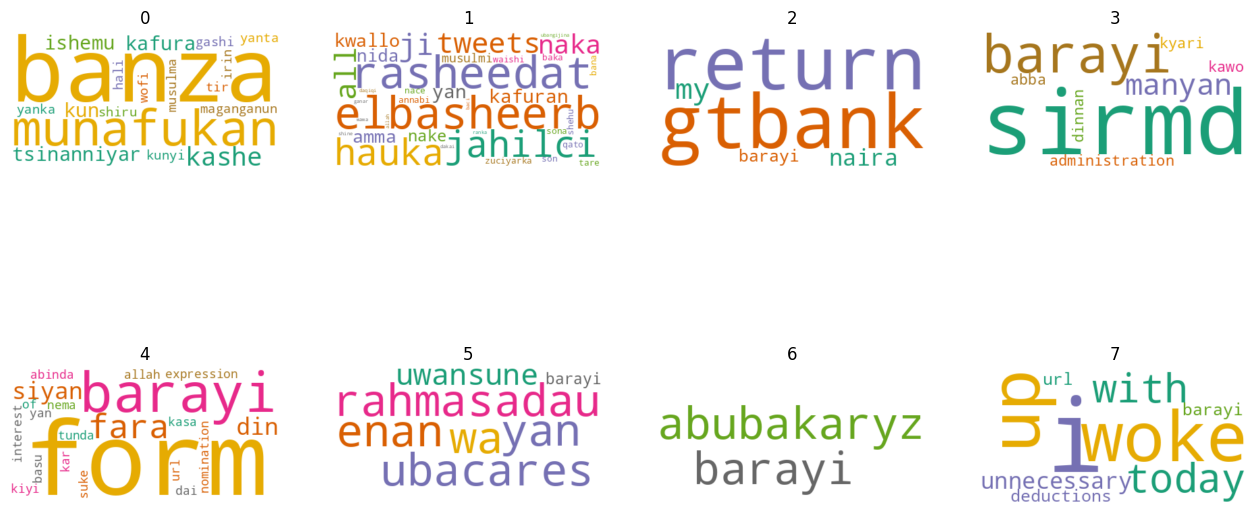

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 8]

# Check the available keys in docTeMx_df2.user_username
available_keys = list(docTeMx_df.user_username.keys())

# Create subplots for each userName
num_subplots = min(len(data.columns), 8)  # Adjust this number as needed
num_rows = num_subplots // 4 + (num_subplots % 4 > 0)
num_cols = min(num_subplots, 4)

fig, axes = plt.subplots(num_rows, num_cols)

for index, user_username in enumerate(data.columns[:num_subplots]):
    row, col = index // 4, index % 4
    if user_username in available_keys:
        wc.generate(cleaned_data.text[user_username])
        ax = axes[row, col] if num_rows > 1 else axes[col]
        ax.imshow(wc, interpolation="bilinear")
        ax.axis("off")
        ax.set_title(available_keys[user_username])
    else:
        print(f"Text data not found for userName: {user_username}")

plt.show()


## **Number of Words**

**Analysis**

In [ ]:
# Calculate the number of unique words for each User_id
unique_list = [data[User_id].to_numpy().nonzero()[0].size for User_id in data.columns]

# Create a DataFrame with comedian names and unique word counts
data_unique_sort = pd.DataFrame({'User_id': data.columns, 'unique_words': unique_list})

# Sort the DataFrame by 'unique_words'
data_unique_sort = data_unique_sort.sort_values(by='User_id')
data_unique_sort.head()

User_id  unique_words
0        0            18
1        1            35
2        2             5
3        3             8
4        4            21

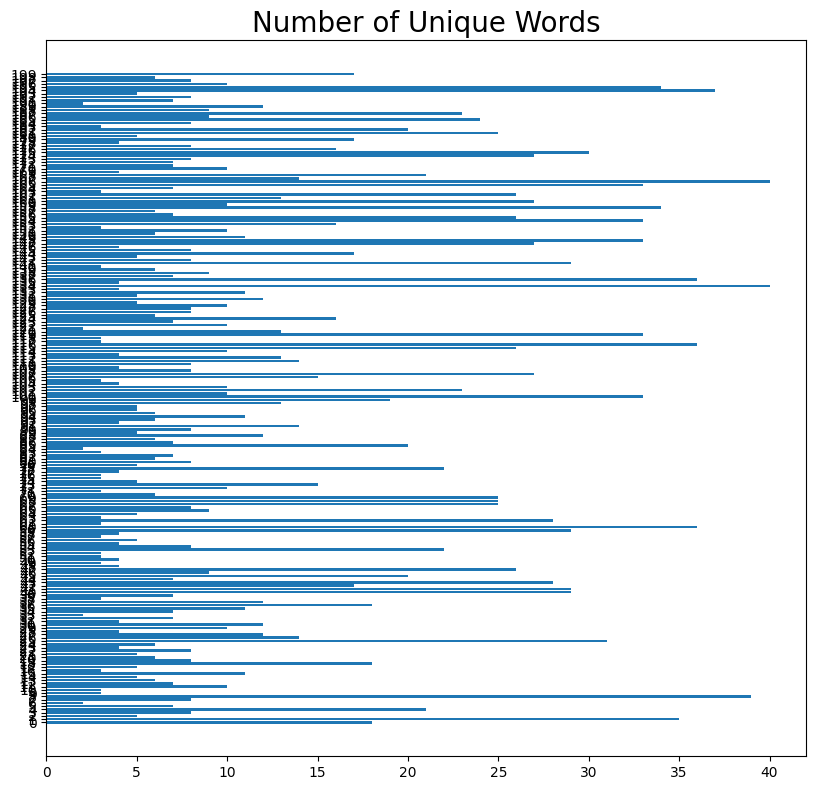

In [ ]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_unique_sort))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.User_id)
plt.title('Number of Unique Words', fontsize=20)

plt.tight_layout()
plt.show()

## **Amount of Profanity**

**Analysis**

In [ ]:
# Let's take a look at the most common words again.
Counter(words).most_common()

[('oga', 166),
 ('ogan', 164),
 ('officialmaimuna', 163),
 ('ok', 163),
 ('okay', 162),
 ('officialnnppng', 161),
 ('officialosgfng', 160),
 ('officialefcc', 160),
 ('off', 156),
 ('ole', 155),
 ('of', 151),
 ('ofcourse', 150),
 ('on', 149),
 ('ondo', 145),
 ('nysc', 142),
 ('one', 136),
 ('nyesome', 129),
 ('onions', 123),
 ('nycs', 113),
 ('abba', 111),
 ('only', 91),
 ('barayi', 86),
 ('nutsuwa', 81),
 ('pi', 77),
 ('players', 64),
 ('oo', 54),
 ('url', 54),
 ('jahilai', 52),
 ('nutsu', 46),
 ('person', 45),
 ('barayin', 37),
 ('nunamuku', 35),
 ('banza', 33),
 ('allah', 33),
 ('please', 32),
 ('oyebosunday', 24),
 ('patronizing', 22),
 ('dan', 22),
 ('people', 20),
 ('page', 17),
 ('yan', 16),
 ('nuna', 16),
 ('ai', 15),
 ('to', 13),
 ('opay', 13),
 ('kawai', 13),
 ('amma', 11),
 ('wallahi', 11),
 ('you', 11),
 ('masu', 11),
 ('pendingustaz', 11),
 ('din', 10),
 ('dai', 10),
 ('the', 10),
 ('bbchausa', 10),
 ('payroll', 9),
 ('naka', 8),
 ('is', 8),
 ('and', 8),
 ('irin', 7),
 ('pa

In [ ]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['ubanki', 'umhmanga', 'satan']]
data_profanity = pd.concat([data_bad_words.ubanki + data_bad_words.umhmanga, data_bad_words.satan], axis=1)
data_profanity.columns = ['u_word', 's_word']
data_profanity

u_word  s_word
0         0       0
1         0       0
2         0       0
3         0       0
4         0       0
5         0       0
6         0       0
7         0       0
8         0       1
9         0       0
10        0       0
11        0       0
12        0       0
13        0       0
14        0       0
15        0       0
16        0       0
17        0       0
18        0       0
19        0       0
20        0       0
21        0       0
22        0       0
23        0       0
24        1       0
25        0       0
26        0       0
27        0       0
28        0       0
29        0       0
30        0       0
31        0       0
32        0       0
33        0       0
34        0       0
35        0       0
36        0       0
37        0       0
38        0       0
39        0       0
40        0       0
41        0       0
42        0       0
43        0       0
44        0       0
45        0       0
46        0       0
47        0       0
48        0       0
49        0       0
50        0       0
51        0       0
52        0       0
53        0       0
54        0       0
55        0       0
56        0       0
57        0       0
58        0       0
59        0       0
60        0       0
61        0       0
62        0       0
63        0       0
64        0       0
65        0       0
66        0       0
67        0       0
68        0       0
69        0       0
70        0       0
71        0       0
72        0       0
73        0       0
74        0       0
75        0       0
76        0       0
77        0       0
78        0       0
79        0       0
80        0       0
81        0       0
82        0       0
83        0       0
84        0       0
85        0       0
86        0       0
87        0       0
88        0       0
89        0       0
90        0       0
91        1       0
92        0       0
93        0       0
94        0       0
95        0       0
96        0       0
97        0       0
98        0       0
99        0       0
100       0       0
101       0       0
102       0       0
103       0       0
104       0       0
105       0       0
106       0       0
107       0       0
108       0       0
109       0       0
110       0       0
111       0       0
112       0       0
113       0       0
114       0       0
115       0       0
116       0       0
117       0       0
118       0       0
119       0       0
120       0       0
121       0       0
122       0       0
123       0       0
124       0       0
125       0       0
126       0       0
127       0       0
128       0       0
129       0       0
130       0       0
131       0       0
132       0       0
133       0       0
134       0       0
135       0       0
136       0       0
137       0       0
138       0       0
139       0       0
140       0       0
141       0       0
142       0       0
143       0       0
144       0       0
145       0       0
146       0       0
147       0       0
148       0       0
149       0       0
150       0       0
151       0       0
152       0       0
153       0       0
154       0       0
155       0       0
156       0       0
157       0       0
158       0       0
159       0       0
160       0       0
161       0       0
162       0       0
163       0       0
164       0       0
165       0       0
166       0       0
167       0       0
168       0       0
169       0       0
170       0       0
171       0       0
172       0       0
173       0       0
174       0       0
175       0       0
176       0       0
177       0       0
178       0       0
179       0       0
180       0       0
181       0       0
182       0       0
183       0       0
184       0       0
185       0       0
186       0       0
187       0       0
188       0       0
189       0       0
190       0       0
191       0       0
192       0       0
193       0       0
194       0       0
195       0       0
196       0       0
197       0       0
198       0       0
199  

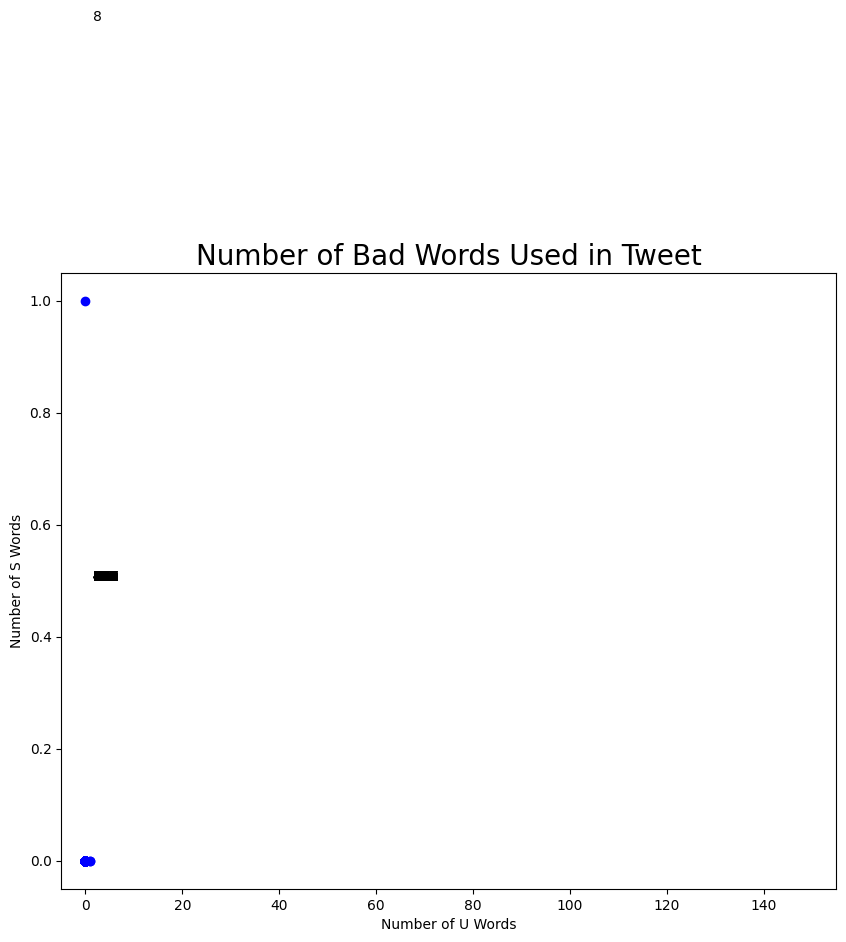

In [ ]:
# Let's create a scatter plot of our findings

plt.rcParams['figure.figsize'] = [10, 8]

for i, User_id in enumerate(data_profanity.index):
    x = data_profanity.u_word.loc[User_id]
    y = data_profanity.s_word.loc[User_id]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, available_keys[i], fontsize=10)
    plt.xlim(-5, 155)

plt.title('Number of Bad Words Used in Tweet', fontsize=20)
plt.xlabel('Number of U Words', fontsize=10)
plt.ylabel('Number of S Words', fontsize=10)

plt.show()

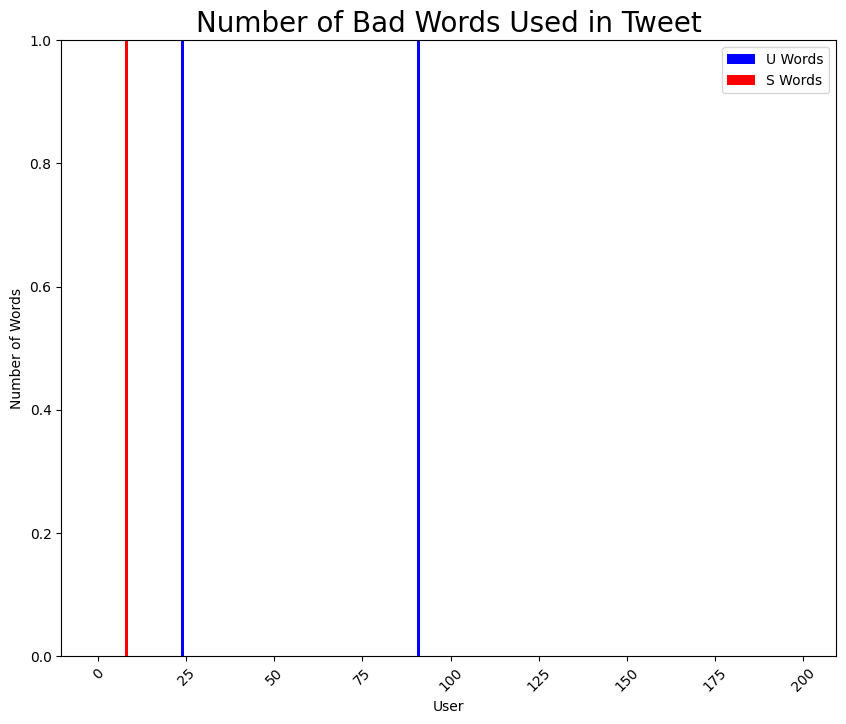

In [ ]:

plt.rcParams['figure.figsize'] = [10, 8]

# Create a bar plot
for i, User_id in enumerate(data_profanity.index):
    x = data_profanity.u_word.loc[User_id]
    y = data_profanity.s_word.loc[User_id]
    plt.bar(available_keys[i], x, color='blue')
    plt.bar(available_keys[i], y, color='red', bottom=x)

# Create a legend with two items
plt.legend(['U Words', 'S Words'])

plt.title('Number of Bad Words Used in Tweet', fontsize=20)
plt.xlabel('User', fontsize=10)
plt.ylabel('Number of Words', fontsize=10)
plt.xticks(rotation=45)

plt.show()


### **Findings:**

 The results, especially the profanity findings, are interesting and make general sense, so we're going to move on

# **NLP Techniques**


1.   **Sentiment Analysis**
2.   **Topic Modeling**
3.   **Text Generation**
4.   **Hate Speech detection**


1.   **Sentiment Analysis**

Input is a corpus which is our clean_data as order of words matters.

"kiyo" = positive, "BaA kiyo" = negative

In [ ]:
from textblob import TextBlob

In [ ]:
cleaned_data.head()


ID             tweet_id  user_username  \
0   0  1529190000000000000        mhs4lyf   
1   2  1516250000000000000    kaduna_mboy   
2   3  1641890000000000000  BaheerahUsman   
3   4  1529430000000000000   the_scholar1   
4   5  1504720000000000000   lawanceiliya   

                                                text    Label  
0  an kashe tsinanniyar kafura kun ishemu da maga...  Abusive  
1  elbasheerb rasheedat jahilci hauka ji all twee...  Abusive  
2                     gtbank return my  naira barayi  Abusive  
3  sirmd duk kuma barayi ne manyan administration...  Abusive  
4  barayi sun fara siyan form din expression of i...  Abusive

In [ ]:
data1 = cleaned_data
data1.head()

ID             tweet_id  user_username  \
0   0  1529190000000000000        mhs4lyf   
1   2  1516250000000000000    kaduna_mboy   
2   3  1641890000000000000  BaheerahUsman   
3   4  1529430000000000000   the_scholar1   
4   5  1504720000000000000   lawanceiliya   

                                                text    Label  
0  an kashe tsinanniyar kafura kun ishemu da maga...  Abusive  
1  elbasheerb rasheedat jahilci hauka ji all twee...  Abusive  
2                     gtbank return my  naira barayi  Abusive  
3  sirmd duk kuma barayi ne manyan administration...  Abusive  
4  barayi sun fara siyan form din expression of i...  Abusive

In [ ]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data1['polarity'] = data1['text'].apply(pol)
data1['subjectivity'] = data1['text'].apply(sub)
data1.head()

<ipython-input-56-5a6f005e3750>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['polarity'] = data1['text'].apply(pol)
<ipython-input-56-5a6f005e3750>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['subjectivity'] = data1['text'].apply(sub)


ID             tweet_id  user_username  \
0   0  1529190000000000000        mhs4lyf   
1   2  1516250000000000000    kaduna_mboy   
2   3  1641890000000000000  BaheerahUsman   
3   4  1529430000000000000   the_scholar1   
4   5  1504720000000000000   lawanceiliya   

                                                text    Label  polarity  \
0  an kashe tsinanniyar kafura kun ishemu da maga...  Abusive       0.0   
1  elbasheerb rasheedat jahilci hauka ji all twee...  Abusive       0.0   
2                     gtbank return my  naira barayi  Abusive       0.0   
3  sirmd duk kuma barayi ne manyan administration...  Abusive       0.0   
4  barayi sun fara siyan form din expression of i...  Abusive       0.0   

   subjectivity  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

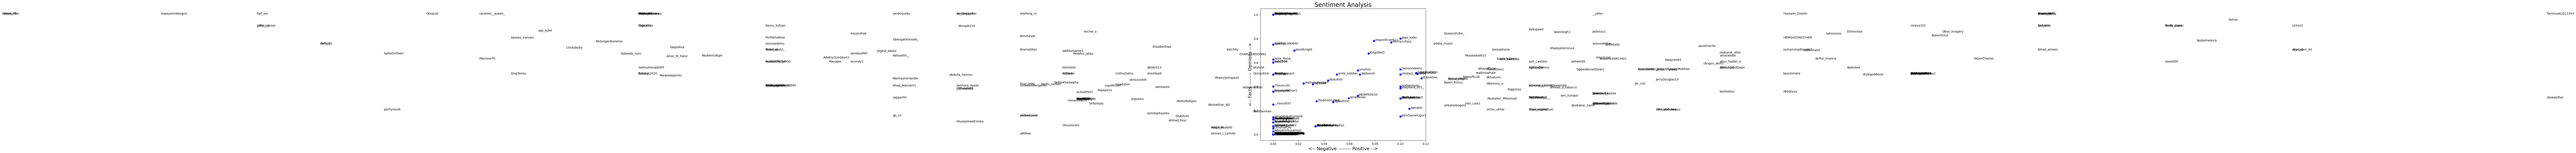

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]

for index, user_username in enumerate(data1.index):
    x = data1.polarity.loc[user_username]
    y = data1.subjectivity.loc[user_username]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data1['user_username'][index], fontsize=10)
    plt.xlim(-.01, .12)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()


2.   **Topic Modeling**

In [ ]:
from gensim import matutils, models
import scipy.sparse

3.   **Text Generation**

In [ ]:
from collections import defaultdict

4.   **Hate Speech detection**

In [ ]:
cleaned_H = cleaned_data[['text', 'Label']]
cleaned_H.head()


text    Label
0  an kashe tsinanniyar kafura kun ishemu da maga...  Abusive
1  elbasheerb rasheedat jahilci hauka ji all twee...  Abusive
2                     gtbank return my  naira barayi  Abusive
3  sirmd duk kuma barayi ne manyan administration...  Abusive
4  barayi sun fara siyan form din expression of i...  Abusive

In [ ]:
unique_values = cleaned_H['Label'].unique()
unique_values

array(['Abusive', 'Hate', 'Normal'], dtype=object)

In [ ]:
cleaned_H.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1171 entries, 0 to 1170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1171 non-null   object
 1   Label   1171 non-null   object
dtypes: object(2)
memory usage: 59.7+ KB


In [ ]:
#cleaned_H.Label = cleaned_H.Label.map({'Normal':2, 'Abusive':1, 'Hate':0})


cleaned_H['Label_e'] = cleaned_H['Label'].map({'Abusive': 0, 'Hate' :1, 'Normal' : 2})

<ipython-input-63-5c9abcbfec19>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_H['Label_e'] = cleaned_H['Label'].map({'Abusive': 0, 'Hate' :1, 'Normal' : 2})


In [ ]:
cleaned_H.head()

text    Label  Label_e
0  an kashe tsinanniyar kafura kun ishemu da maga...  Abusive        0
1  elbasheerb rasheedat jahilci hauka ji all twee...  Abusive        0
2                     gtbank return my  naira barayi  Abusive        0
3  sirmd duk kuma barayi ne manyan administration...  Abusive        0
4  barayi sun fara siyan form din expression of i...  Abusive        0

In [ ]:
# Extract the 'text' column as the feature (X) and the 'Label' column as the target (y)
x = np.array(cleaned_H['text'])
y = np.array(cleaned_H['Label'])


In [ ]:
# Create a CountVectorizer to convert text data into numerical format
cv = CountVectorizer()

# Tokenize and make the document a matrix
x = cv.fit_transform(x)

In [ ]:
# pd.DataFrame(x.toarray(), columns = cv.get_feature_names_out())

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)



In [ ]:
sum(cleaned_H['Label'] == "Abusive")

591

## **Building Models Pipeline**



1.   **Decision Tree Classifier model**




In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
# Create a Decision Tree Classifier model
clf = DecisionTreeClassifier()

# Train the model on the training data
start = datetime.now()
clf.fit(X_train, y_train)
stop = datetime.now()


#Execution time of the model
execution_time_CLF = stop-start

# Use the trained model to make predictions on the test data
y_predic = clf.predict(X_test)

# Calculate the accuracy score of the model on the test data
accuracy = clf.score(X_test, y_test)


# Calculate accuracy, precision, recall, and F1-score
precision = precision_score(y_test, y_predic, average='weighted')
recall = recall_score(y_test, y_predic, average='weighted')
f1 = f1_score(y_test, y_predic, average='weighted')
acc_score = accuracy_score(y_test, y_predic)

# Print the results
print ("Accuracy score of Decision Tree Classifier: ", acc_score * 100)
print("Precision of Decision Tree Classifier: ", precision * 100)
print("Recall of Decision Tree Classifier: ", recall * 100)
print("F1-Score of Decision Tree Classifier: ", f1 * 100)

print("Decision Tree Classifier execution time is: ", execution_time_CLF)

Accuracy score of Decision Tree Classifier:  81.56996587030717
Precision of Decision Tree Classifier:  81.39829640880954
Recall of Decision Tree Classifier:  81.56996587030717
F1-Score of Decision Tree Classifier:  81.10162635107426
Decision Tree Classifier execution time is:  0:00:00.093204


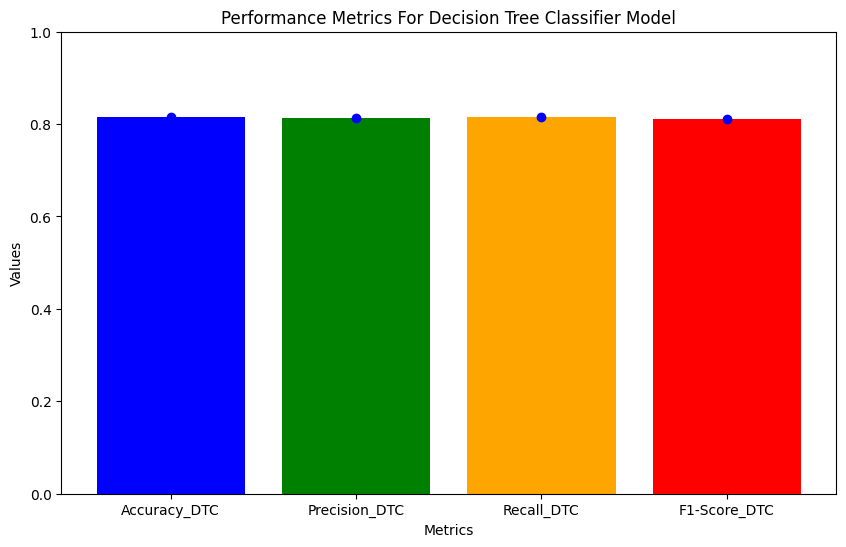

In [ ]:
# Calculate accuracy, precision, recall, and F1-score
accuracy_DTC = accuracy_score(y_test, y_predic)
precision_DTC = precision_score(y_test, y_predic, average='weighted')
recall_DTC = recall_score(y_test, y_predic, average='weighted')
f1_DTC = f1_score(y_test, y_predic, average='weighted')

# Create lists of metric values
metrics = ['Accuracy_DTC', 'Precision_DTC', 'Recall_DTC', 'F1-Score_DTC']
values = [accuracy_DTC, precision_DTC, recall_DTC, f1_DTC]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.scatter(metrics, values, color='blue', marker='o', label='Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics For Decision Tree Classifier Model')
plt.ylim(0, 1.0)  # Set the y-axis limit to 0 to 1 for better visualization
plt.show()

2.   **SVC - Support Vector Classifier**

- For binary and multi-class classification

In [ ]:
from sklearn import svm

# Create an instance of the SVC classifier

svm_classifier = svm.SVC(kernel='linear', probability=True)

# Fit the model and predict probabilities
start = datetime.now()
prob = svm_classifier.fit(X_train, y_train).predict_proba(X_test)
stop = datetime.now()


#Execution time of the model
execution_time_SVC = stop-start

# Predict the classes
y_pred = svm_classifier.predict(X_test)


# Calculate accuracy, precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
acc_score = accuracy_score(y_test, y_pred)

# Print the results
print ("Accuracy score of SVC: ", acc_score * 100)
print("Precision of SVC: ", precision * 100)
print("Recall of SVC: ", recall * 100)
print("F1-Score of SVC: ", f1 * 100)

print("SVC execution time is: ", execution_time_SVC)


Accuracy score of SVC:  86.68941979522185
Precision of SVC:  86.68659955449756
Recall of SVC:  86.68941979522185
F1-Score of SVC:  86.51312111186542
SVC execution time is:  0:00:00.642018


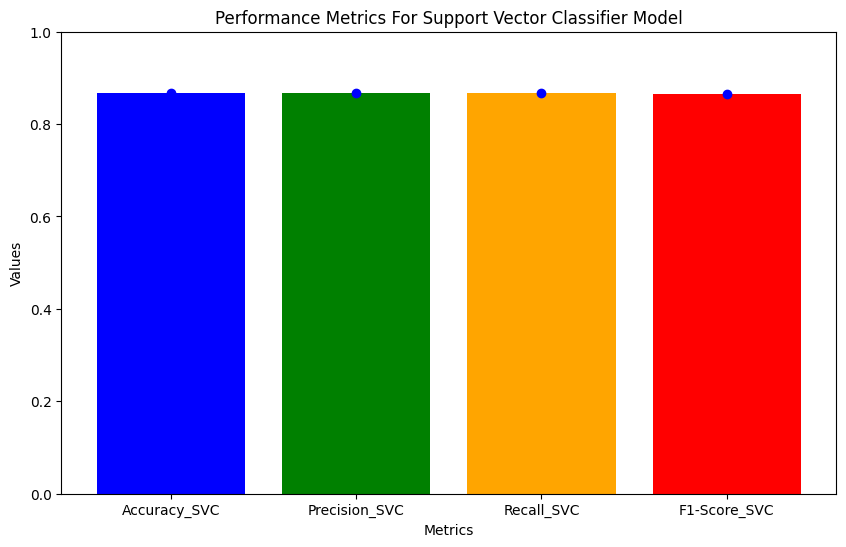

In [ ]:
import matplotlib.pyplot as plt

# Calculate accuracy, precision, recall, and F1-score
accuracy_SVC = accuracy_score(y_test, y_pred)
precision_SVC = precision_score(y_test, y_pred, average='weighted')
recall_SVC = recall_score(y_test, y_pred, average='weighted')
f1_SVC = f1_score(y_test, y_pred, average='weighted')

# Create lists of metric values
metrics = ['Accuracy_SVC', 'Precision_SVC', 'Recall_SVC', 'F1-Score_SVC']
values = [accuracy_SVC, precision_SVC, recall_SVC, f1_SVC]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.scatter(metrics, values, color='blue', marker='o', label='Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics For Support Vector Classifier Model')
plt.ylim(0, 1.0)  # Set the y-axis limit to 0 to 1 for better visualization
plt.show()

3.   **RandomForest Classifier**

- Ensemble learning algorithm that combines multiple decision trees to improve prediction accuracy and handle complex data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
from sklearn import metrics

## Instantiate model with n number of decision trees
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

## Train the model on training data
start = datetime.now()

RF_model.fit(X_train, y_train)
stop = datetime.now()

#Execution time of the model
execution_time_RF = stop-start
print("Random Forest execution time is: ", execution_time_RF)

#Predict and test accuracy
prediction_RF = RF_model.predict(X_test)


#Print overall accuracy

# Calculate accuracy, precision, recall, and F1-score
precision_RF = precision_score(y_test, prediction_RF, average='weighted')
recall_RF = recall_score(y_test, prediction_RF, average='weighted')
f1_RF = f1_score(y_test, prediction_RF, average='weighted')
accuracy_RF = metrics.accuracy_score(y_test, prediction_RF)

# Print the results
print ("Accuracy of Random Forest: ", accuracy_RF * 100)
print("Precision of Random Forest: ", precision_RF * 100)
print("Recall of Random Forest: ", recall_RF * 100)
print("F1-Score of Random Forest: ", f1_RF * 100)


Random Forest execution time is:  0:00:00.472805
Accuracy of Random Forest:  82.5938566552901
Precision of Random Forest:  84.51918642191679
Recall of Random Forest:  82.5938566552901
F1-Score of Random Forest:  79.48067083170723


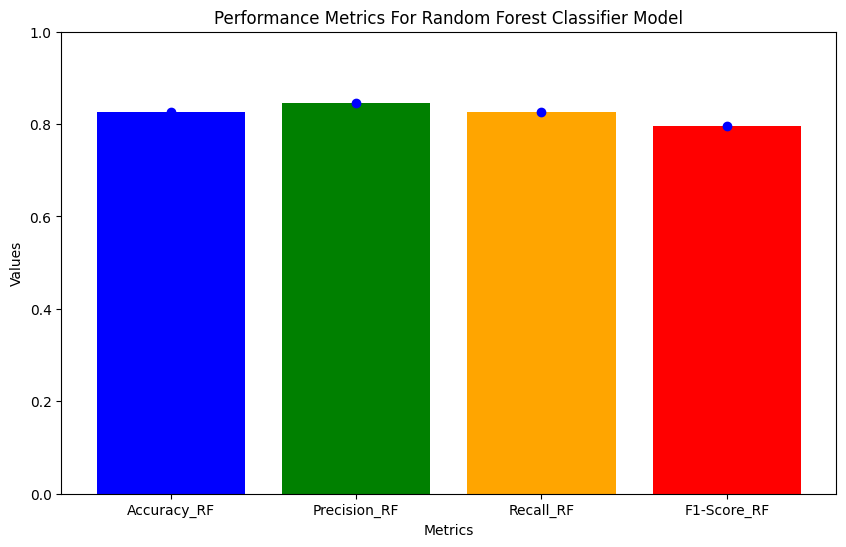

In [ ]:
# Calculate accuracy, precision, recall, and F1-score
accuracy_RF = accuracy_score(y_test, prediction_RF)
precision_RF = precision_score(y_test, prediction_RF, average='weighted')
recall_RF = recall_score(y_test, prediction_RF, average='weighted')
f1_RF = f1_score(y_test, prediction_RF, average='weighted')

# Create lists of metric values
metrics = ['Accuracy_RF', 'Precision_RF', 'Recall_RF', 'F1-Score_RF']
values = [accuracy_RF, precision_RF, recall_RF, f1_RF]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.scatter(metrics, values, color='blue', marker='o', label='Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics For Random Forest Classifier Model')
plt.ylim(0, 1.0)  # Set the y-axis limit to 0 to 1 for better visualization
plt.show()

In [ ]:
# Summary

print("__________________Model's Execution Time_________________________")
print("Decision Tree Classifier execution time is: ", execution_time_CLF)
print("Support Vector Classifier execution time is: ", execution_time_SVC)
print("Random Forest execution time is: ", execution_time_RF)


print("___________________Model's Accuracy Score________________________")
print ("Accuracy of Decision Tree Classifier: ", accuracy * 100)
print ("Accuracy of Support Vector Classifier: ", accuracy_score(y_test, y_pred) * 100)
print ("Accuracy of Random Forest: ", accuracy_score(y_test, prediction_RF)  * 100)


print("___________________Model's Recall Score________________________")
print("Recall of Decision Tree Classifier: ", recall * 100)
print("Recall of Support Vector Classifier: ", recall * 100)
print("Recall of Random Forest: ", recall * 100)


print("___________________Model's Precision Score________________________")
print("Precision of Decision Tree Classifier: ", precision * 100)
print("Precision of SVC: ", precision * 100)
print("Precision of Random Forest: ", precision * 100)


print("___________________Model's F1-Score________________________")
print("F1-Score of Decision Tree Classifier: ", f1 * 100)
print("F1-Score of SVC: ", f1 * 100)
print("F1-Score of Random Forest: ", f1 * 100)

__________________Model's Execution Time_________________________
Decision Tree Classifier execution time is:  0:00:00.093204
Support Vector Classifier execution time is:  0:00:00.642018
Random Forest execution time is:  0:00:00.472805
___________________Model's Accuracy Score________________________
Accuracy of Decision Tree Classifier:  81.56996587030717
Accuracy of Support Vector Classifier:  86.68941979522185
Accuracy of Random Forest:  82.5938566552901
___________________Model's Recall Score________________________
Recall of Decision Tree Classifier:  86.68941979522185
Recall of Support Vector Classifier:  86.68941979522185
Recall of Random Forest:  86.68941979522185
___________________Model's Precision Score________________________
Precision of Decision Tree Classifier:  86.68659955449756
Precision of SVC:  86.68659955449756
Precision of Random Forest:  86.68659955449756
___________________Model's F1-Score________________________
F1-Score of Decision Tree Classifier:  86.51312111

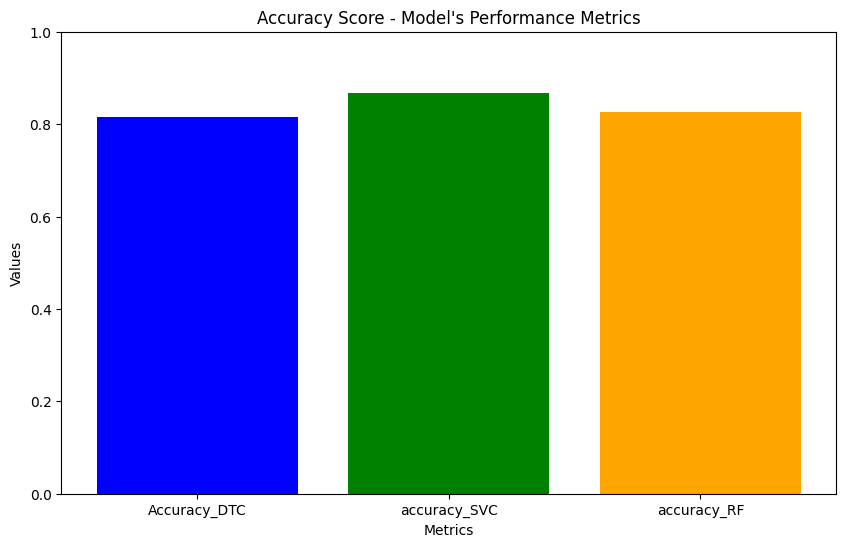

In [ ]:
# Calculate accuracy, precision, recall, and F1-score
accuracy_DTC = accuracy_score(y_test, y_predic)
accuracy_SVC = accuracy_score(y_test, y_pred)
accuracy_RF = accuracy_score(y_test, prediction_RF)


# Create lists of metric values
metrics = ['Accuracy_DTC', 'accuracy_SVC', 'accuracy_RF']
values = [accuracy_DTC, accuracy_SVC, accuracy_RF]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Accuracy Score - Model\'s Performance Metrics')
plt.ylim(0, 1.0)  # Set the y-axis limit to 0 to 1 for better visualization
plt.show()

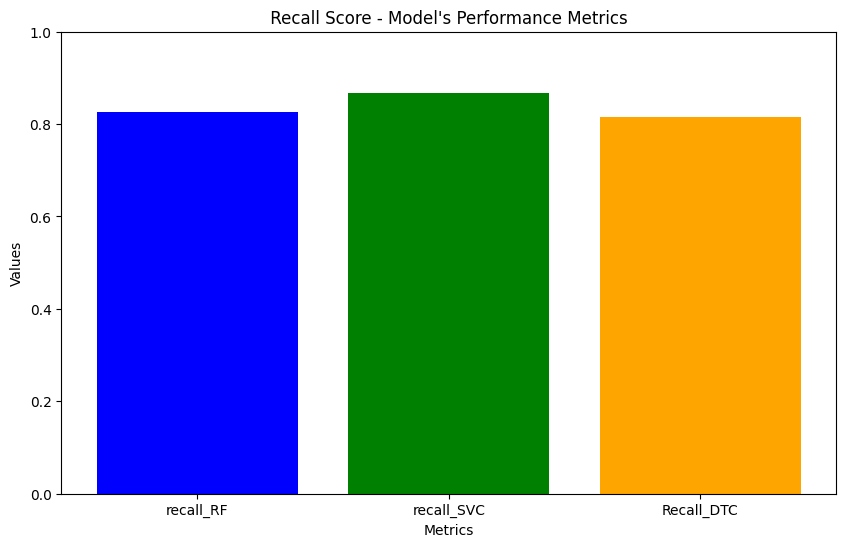

In [ ]:
# Calculate accuracy, precision, recall, and F1-score
recall_RF = recall_score(y_test, prediction_RF, average='weighted')
recall_SVC = recall_score(y_test, y_pred, average='weighted')
recall_DTC = recall_score(y_test, y_predic, average='weighted')

# Create lists of metric values
metrics = ['recall_RF', 'recall_SVC', 'Recall_DTC']
values = [recall_RF, recall_SVC, recall_DTC]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title(' Recall Score - Model\'s Performance Metrics ')
plt.ylim(0, 1.0)  # Set the y-axis limit to 0 to 1 for better visualization
plt.show()

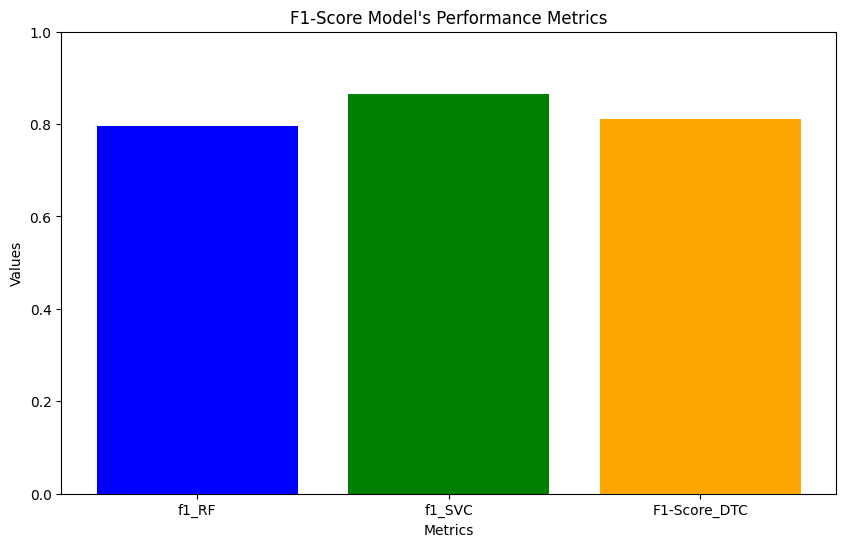

In [ ]:
# Calculate accuracy, precision, recall, and F1-score
f1_RF = f1_score(y_test, prediction_RF, average='weighted')
f1_DTC = f1_score(y_test, y_predic, average='weighted')
f1_SVC = f1_score(y_test, y_pred, average='weighted')

# Create lists of metric values
metrics = ['f1_RF', 'f1_SVC', 'F1-Score_DTC']
values = [f1_RF, f1_SVC, f1_DTC]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('F1-Score Model\'s Performance Metrics')
plt.ylim(0, 1.0)  # Set the y-axis limit to 0 to 1 for better visualization
plt.show()

## **Model's Usage**

In [ ]:
test_data = 'elbasheerb rasheedat jahilci hauka ji all tweets naka duk kafuran yan kwallo amma nida nake musulmi har zuciyarka baka sona don bana tare da wani qato waishi shehu nace ina son annabi da ubangijina shine ranka ya baci wawa daqiqi allah ya ganar dakai'
a = cv.transform([test_data]).toarray()
print(clf.predict(a))

['Abusive']


In [ ]:
test_da = 'elbasheerb rasheedat jahilci hauka ji all tweets naka duk kafuran yan kwallo amma nida nake musulmi har zuciyarka baka sona don bana tare da wani qato waishi shehu nace ina son annabi da ubangijina shine ranka ya baci wawa daqiqi allah ya ganar dakai'

b = cv.transform([test_da]).toarray()

print(svm_classifier.predict(b))

['Abusive']


In [ ]:
test_dat = 'elbasheerb rasheedat jahilci hauka ji all tweets naka duk kafuran yan kwallo amma nida nake musulmi har zuciyarka baka sona don bana tare da wani qato waishi shehu nace ina son annabi da ubangijina shine ranka ya baci wawa daqiqi allah ya ganar dakai'


b = cv.transform([test_dat]).toarray()

print(RF_model.predict(b))

['Abusive']
